In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import pymysql

## Definitions

In [122]:
ks_number = 6249
profile_id = 408
portfolio_id = 13
from_date = '2019-01-01'
to_date = '2019-02-05'
data_source_name = 'WL_8_months_back.csv'
query_name = 'performance_by_affcode_device.sql'
parse_list = ['date']

In [123]:
from datetime import datetime
time_interval = (datetime.strptime(to_date, '%Y-%m-%d') - datetime.strptime(from_date, '%Y-%m-%d')).days

## Read SQL query

In [124]:
fd = open('./SQL/' + query_name, 'r')
sqlFile = fd.read().format(portfolio_id=portfolio_id,profile_id=profile_id,from_date=from_date,to_date=to_date)
fd.close()

## SQL conncection

In [125]:
def get_conn_mysql(ks_number):
   host_get='eclidb'+ks_number+'.kenshooprd.local'
   conn = pymysql.connect(host=host_get, port=3306, user='query', passwd='query', db='kazaam')
   return conn

query_mysql = sqlFile
conn =  get_conn_mysql(str(ks_number))
df = pd.read_sql(query_mysql, conn, parse_dates = parse_list)

## Define Plotting

In [129]:
def plot_daily_hourly_metrics(df, xcol_name='date', metrics=None):
    fig, ax1 = plt.subplots()
    ax1.plot(df[xcol_name], df[metrics])
    ax1.set_xlabel('Year Month_day')
    ax1.set_ylabel(metrics)
    days = mdates.DayLocator(interval=math.ceil(time_interval/30))   # every day
    months = mdates.MonthLocator(interval=3)
    years = mdates.YearLocator()# every 2 months
    daysFmt = mdates.DateFormatter('%b %d')
    yearsFmt = mdates.DateFormatter('%Y')
    
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(yearsFmt)
    ax1.xaxis.set_minor_locator(days)
    ax1.xaxis.set_minor_formatter(daysFmt)
        
    datemin = np.datetime64(df[xcol_name].iloc[0])
    datemax = np.datetime64(df[xcol_name].iloc[-1])
    ax1.set_xlim(datemin, datemax)
    
    plt.tick_params(axis='x', which='minor', labelsize=10, labelrotation=45, length=3)
    plt.tick_params(axis='x', which='major', labelsize=15, labelrotation=45, length=10)
    
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle(metrics, fontsize=16)
    plt.legend(metrics)
    plt.show()

## Main

In [130]:
df.head()

,date,clicks,cpc,cost,conversions,rev,cpa,CVR,avg_pos,avg_bid,KPI
0,2019-01-01,3664.0,0.685415,2511.359996,49.0,18441.759888,51.252245,0.013373,4.385082,0.582677,7.343336
1,2019-01-02,6383.0,0.670249,4278.200000,60.0,26939.100121,71.303333,0.009400,4.404093,0.609262,6.296830
2,2019-01-03,5582.0,0.699506,3904.639991,58.0,22440.820045,67.321379,0.010391,4.465175,0.616158,5.747219
3,2019-01-04,4853.0,0.655349,3180.409994,64.0,25135.210052,49.693906,0.013188,4.489983,0.594734,7.903135
4,2019-01-05,3694.0,0.648140,2394.229994,40.0,12474.749908,59.855750,0.010828,4.333374,0.608541,5.210339


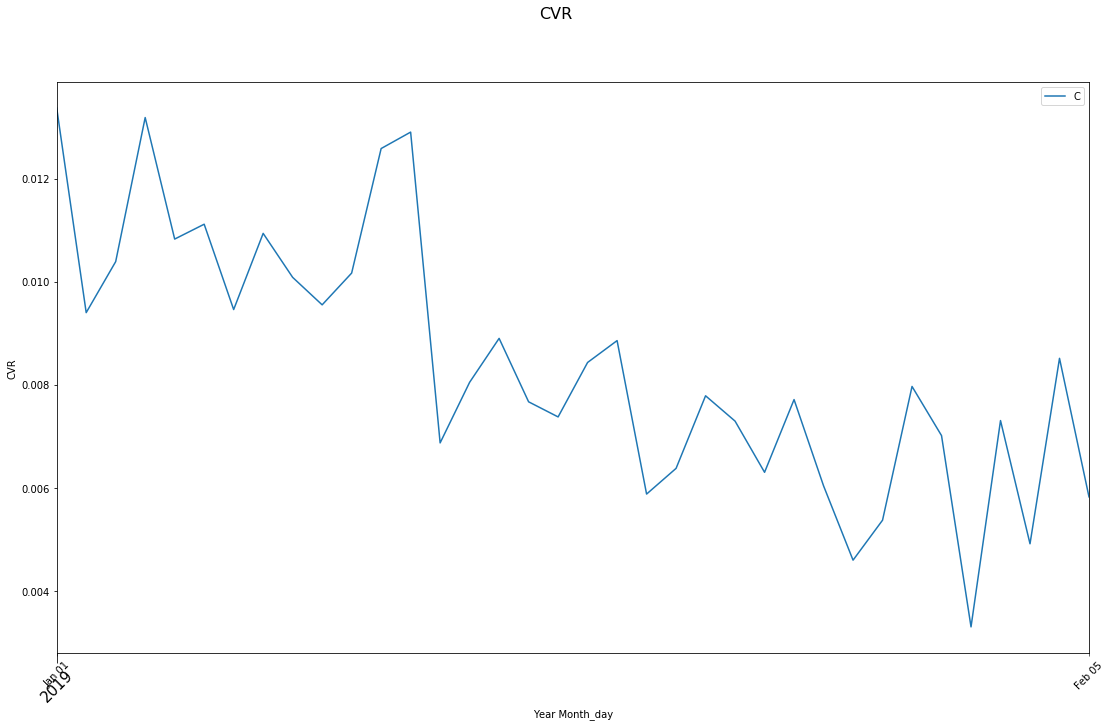

In [131]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='CVR')

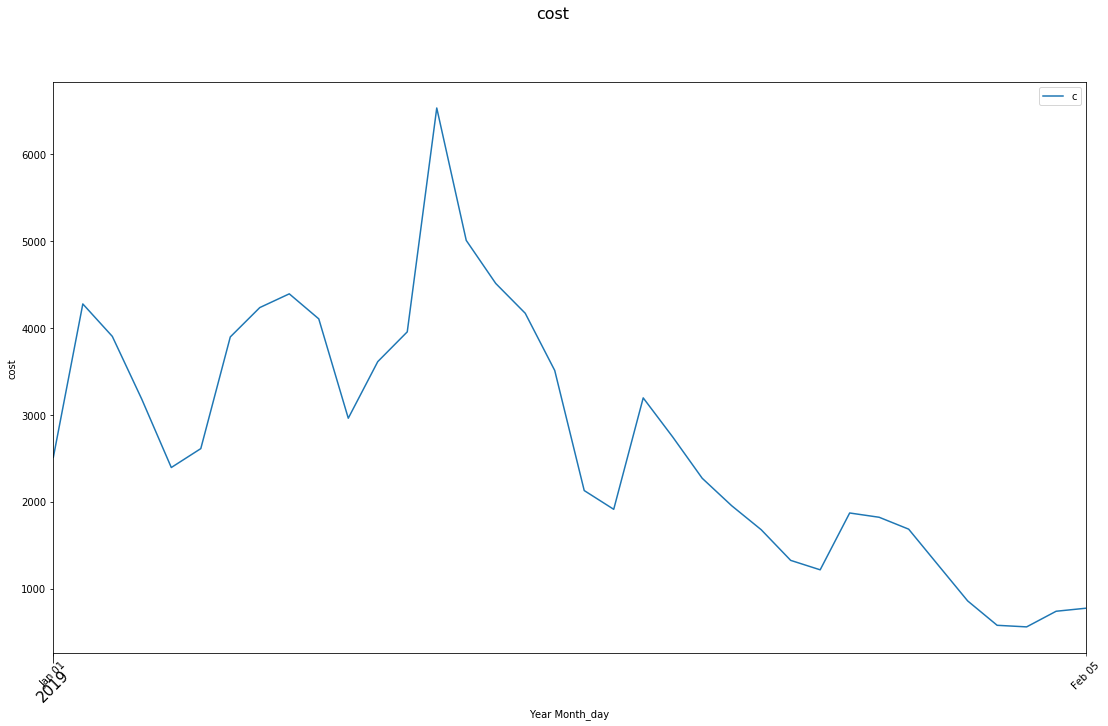

In [132]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='cost')

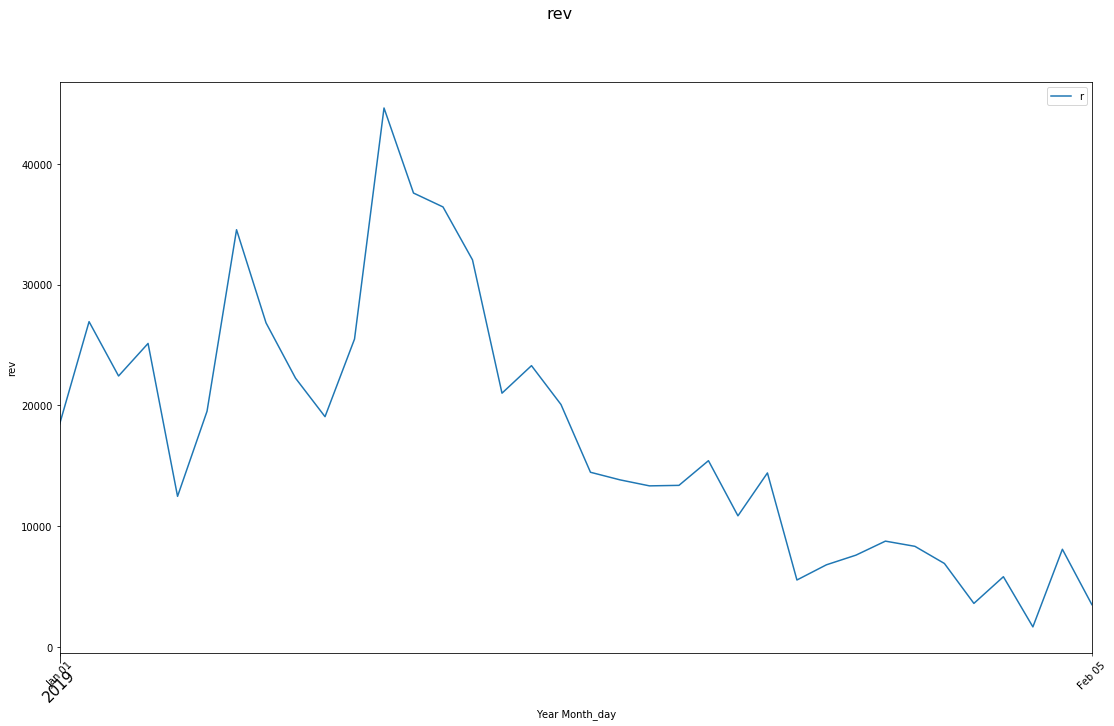

In [133]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='rev')

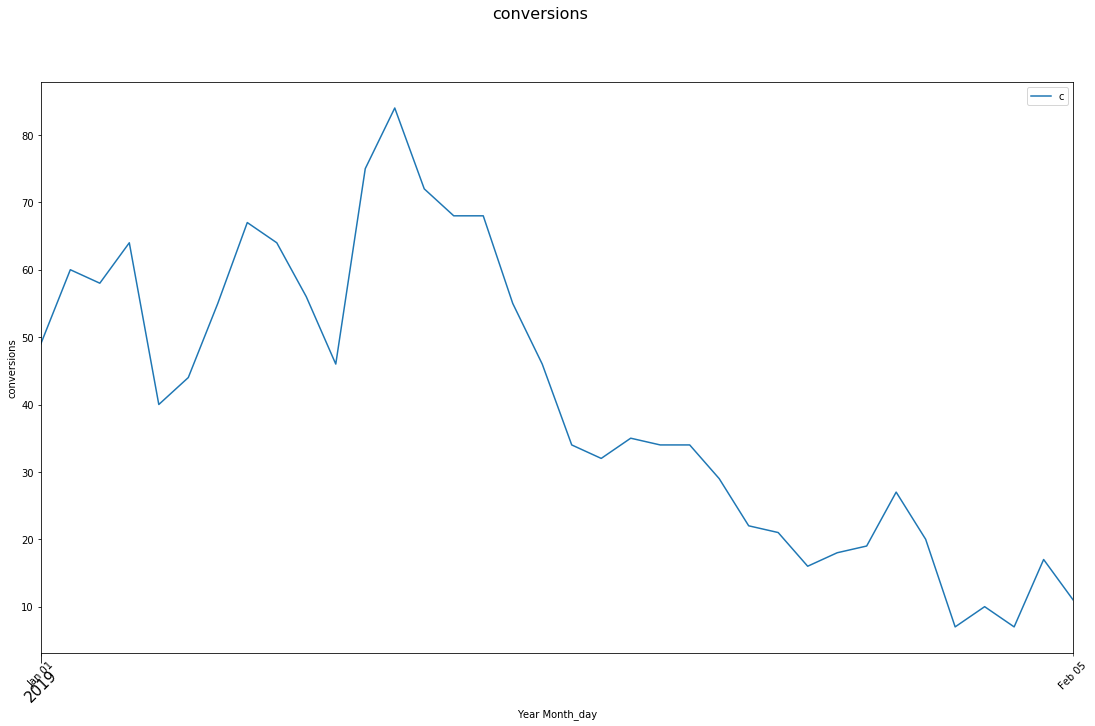

In [134]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='conversions')

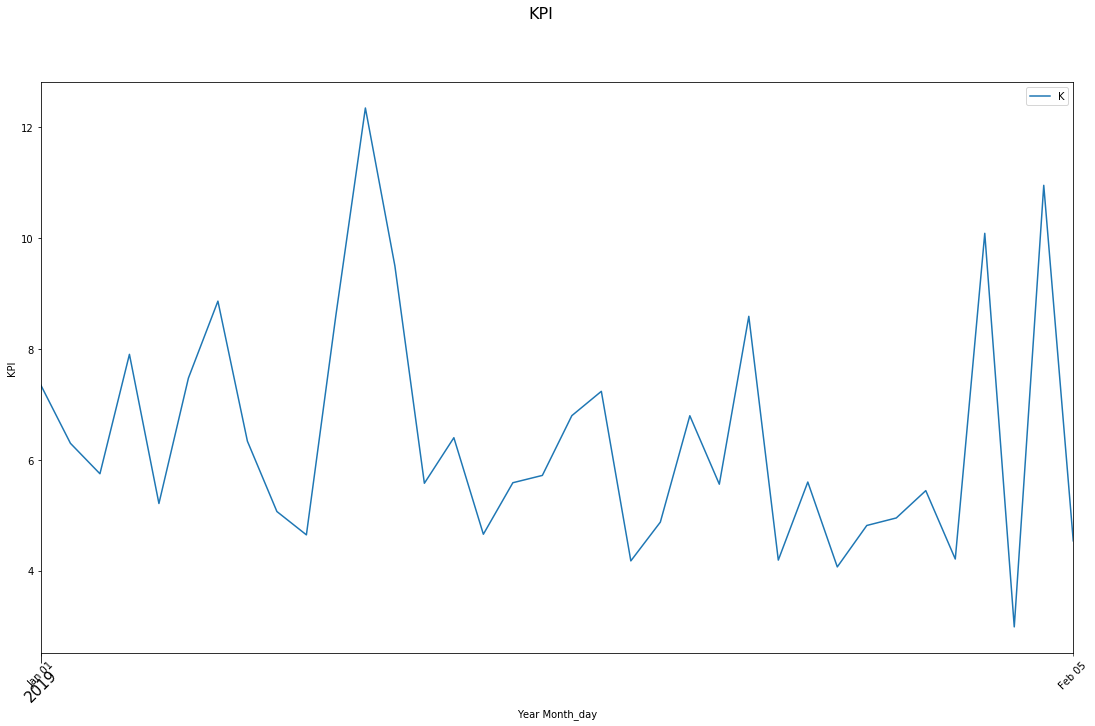

In [135]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='KPI')